In [ ]:
# Install necessary libraries
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. Generate Synthetic Data ---
np.random.seed(42) # for reproducibility

num_students = 100

data = {
    'student_id': range(1, num_students + 1),
    'name': [f'Student_{i}' for i in range(1, num_students + 1)],
    'class': np.random.choice(['Class A', 'Class B', 'Class C'], num_students),
    'comprehension': np.random.randint(50, 100, num_students),
    'attention': np.random.randint(40, 95, num_students),
    'focus': np.random.randint(45, 90, num_students),
    'retention': np.random.randint(55, 100, num_students),
    'engagement_time': np.random.randint(30, 180, num_students)
}

df = pd.DataFrame(data)

# Create a more realistic assessment_score
# It's a weighted sum of cognitive skills and engagement, plus some noise
df['assessment_score'] = (
    0.3 * df['comprehension'] +
    0.25 * df['attention'] +
    0.25 * df['focus'] +
    0.15 * df['retention'] +
    0.05 * (df['engagement_time'] / 180 * 100) +
    np.random.randint(-10, 10, num_students)
).astype(int).clip(0, 100)

print("Generated Dataset Head:")
print(df.head())

Generated Dataset Head:
   student_id       name    class  comprehension  attention  focus  retention  \
0           1  Student_1  Class C             93         63     64         61   
1           2  Student_2  Class A             57         80     68         90   
2           3  Student_3  Class C             73         91     77         99   
3           4  Student_4  Class C             60         88     68         74   
4           5  Student_5  Class A             66         88     55         55   

   engagement_time  assessment_score  
0               45                79  
1               53                75  
2              109                77  
3               31                70  
4              157                61  



--- Correlation Matrix ---
                  comprehension  attention     focus  retention  \
comprehension          1.000000   0.048010  0.017453  -0.029187   
attention              0.048010   1.000000  0.116015  -0.010135   
focus                  0.017453   0.116015  1.000000  -0.129447   
retention             -0.029187  -0.010135 -0.129447   1.000000   
engagement_time       -0.092164   0.096167 -0.130919   0.043870   
assessment_score       0.442637   0.547687  0.320957   0.170006   

                  engagement_time  assessment_score  
comprehension           -0.092164          0.442637  
attention                0.096167          0.547687  
focus                   -0.130919          0.320957  
retention                0.043870          0.170006  
engagement_time          1.000000          0.080413  
assessment_score         0.080413          1.000000  


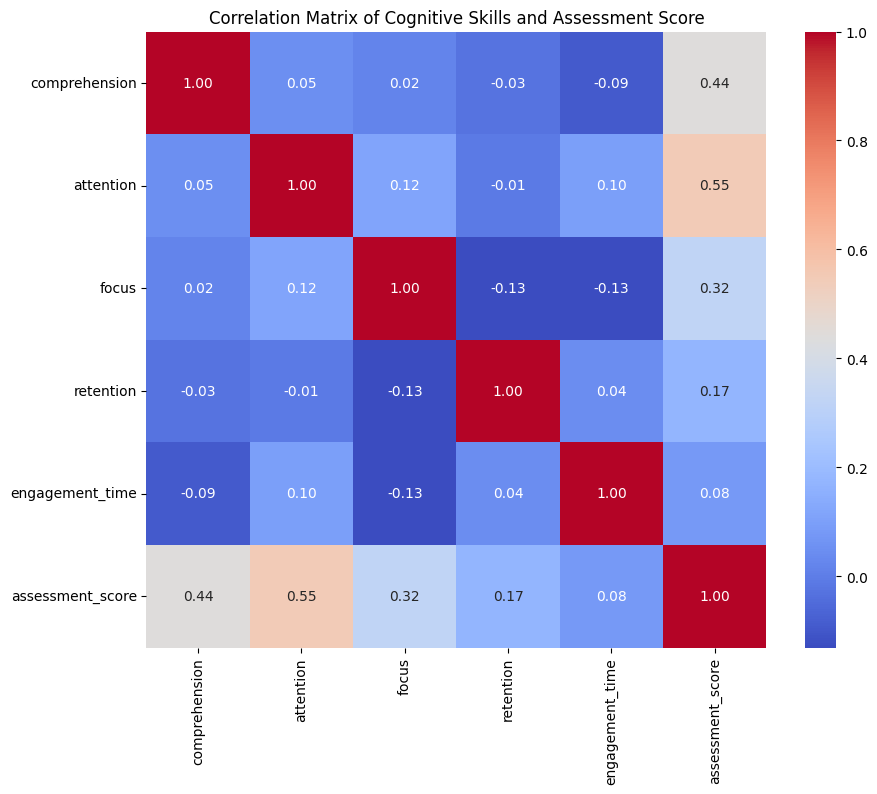

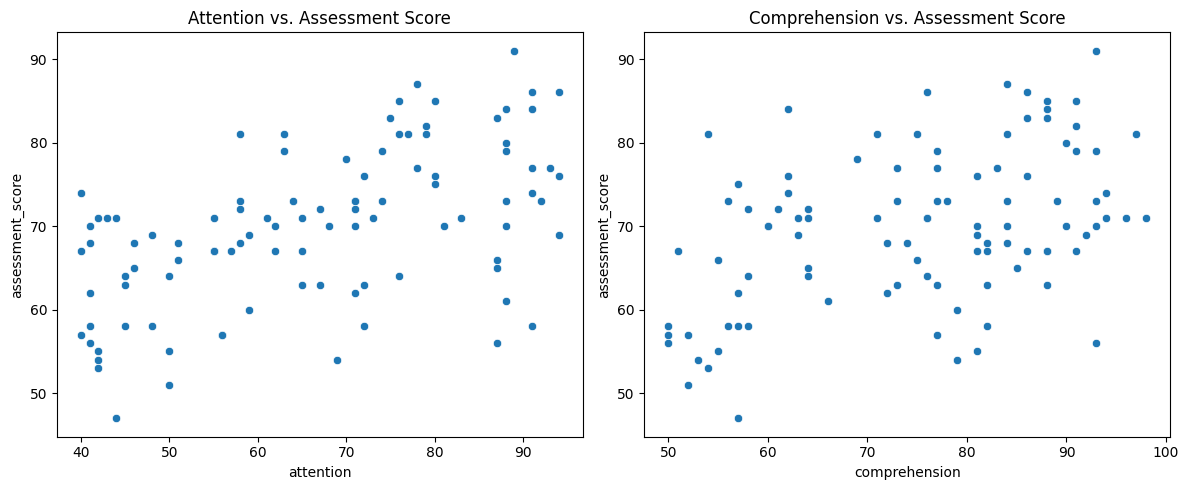

In [ ]:
# --- 2. Correlational Analysis ---
print("\n--- Correlation Matrix ---")
correlation_matrix = df[['comprehension', 'attention', 'focus', 'retention', 'engagement_time', 'assessment_score']].corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Cognitive Skills and Assessment Score')
plt.show()

# Visualize specific correlations with scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='attention', y='assessment_score', data=df)
plt.title('Attention vs. Assessment Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='comprehension', y='assessment_score', data=df)
plt.title('Comprehension vs. Assessment Score')
plt.tight_layout()
plt.show()

In [ ]:
# --- 3. Simple ML Model for Assessment Score Prediction ---

# Define features and target
features = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time']
target = 'assessment_score'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- ML Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("Model Coefficients:", model.coef_)


--- ML Model Performance ---
Mean Squared Error (MSE): 42.25
R-squared (R2): 0.57
Model Coefficients: [0.27825569 0.28365444 0.21277453 0.14379019 0.02460776]


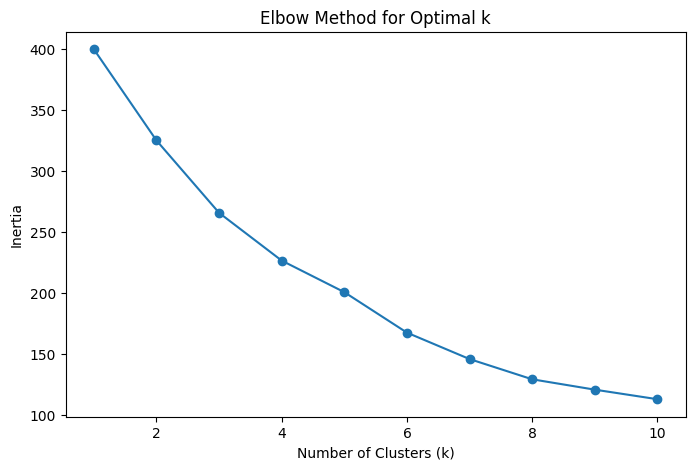


--- Student Personas (Clusters) ---
   student_id       name    class  comprehension  attention  focus  retention  \
0           1  Student_1  Class C             93         63     64         61   
1           2  Student_2  Class A             57         80     68         90   
2           3  Student_3  Class C             73         91     77         99   
3           4  Student_4  Class C             60         88     68         74   
4           5  Student_5  Class A             66         88     55         55   

   engagement_time  assessment_score  persona  
0               45                79        1  
1               53                75        0  
2              109                77        0  
3               31                70        0  
4              157                61        1  

Persona Summary (Average Skills and Score):
         comprehension  attention      focus  retention  assessment_score
persona                                                              

In [ ]:
# --- 4. Student Clustering (Learning Personas) ---

# Select features for clustering
clustering_features = ['comprehension', 'attention', 'focus', 'retention']
X_cluster = df[clustering_features]

# Scale the data for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, let's assume k=3 is a good choice
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['persona'] = kmeans.fit_predict(X_scaled)

print("\n--- Student Personas (Clusters) ---")
print(df.head())

# Analyze the characteristics of each cluster
persona_summary = df.groupby('persona')[clustering_features + ['assessment_score']].mean()
print("\nPersona Summary (Average Skills and Score):")
print(persona_summary)

In [ ]:
# Assuming your final DataFrame is named `df`
df.to_json('data.json', orient='records', indent=4)